In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
from sklearn import datasets, linear_model
import math

%matplotlib inline

In [27]:
def ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled',
          ddof=1.):
    '''test for mean based on normal distribution, one or two samples

    In the case of two samples, the samples are assumed to be independent.

    Parameters
    ----------
    x1, x2 : array_like, 1-D or 2-D
        two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : string
        The alternative hypothesis, H1, has to be one of the following

           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means larger than value
           'smaller' :  H1: difference in means smaller than value

    usevar : string, 'pooled'
        Currently, only 'pooled' is implemented.
        If ``pooled``, then the standard deviation of the samples is assumed to be
        the same. see CompareMeans.ztest_ind for different options.
    ddof : int
        Degrees of freedom use in the calculation of the variance of the mean
        estimate. In the case of comparing means this is one, however it can
        be adjusted for testing other statistics (proportion, correlation)

    Returns
    -------
    tstat : float
        test statisic
    pvalue : float
        pvalue of the t-test

    Notes
    -----
    usevar not implemented, is always pooled in two sample case
    use CompareMeans instead.

    '''
    # TODO: this should delegate to CompareMeans like ttest_ind
    #       However that does not implement ddof

    #usevar is not used, always pooled

    if usevar != 'pooled':
        raise NotImplementedError('only usevar="pooled" is implemented')

    x1 = np.asarray(x1)
    nobs1 = x1.shape[0]
    x1_mean = x1.mean(0)
    x1_var = x1.var(0)
    if x2 is not None:
        x2 = np.asarray(x2)
        nobs2 = x2.shape[0]
        x2_mean = x2.mean(0)
        x2_var = x2.var(0)
        var_pooled = (nobs1 * x1_var + nobs2 * x2_var)
        var_pooled /= (nobs1 + nobs2 - 2 * ddof)
        var_pooled *= (1. / nobs1 + 1. / nobs2)
    else:
        var_pooled = x1_var / (nobs1 - ddof)
        x2_mean = 0

    std_diff = np.sqrt(var_pooled)
    #stat = x1_mean - x2_mean - value
    return _zstat_generic(x1_mean, x2_mean, std_diff, alternative, diff=value)

def _zstat_generic(value1, value2, std_diff, alternative, diff=0):
    '''generic (normal) z-test to save typing

    can be used as ztest based on summary statistics

    '''
    zstat = (value1 - value2 - diff) / std_diff
    if alternative in ['two-sided', '2-sided', '2s']:
        pvalue = stats.norm.sf(np.abs(zstat))*2
    elif alternative in ['larger', 'l']:
        pvalue = stats.norm.sf(zstat)
    elif alternative in ['smaller', 's']:
        pvalue = stats.norm.cdf(zstat)
    else:
        raise ValueError('invalid alternative')
    return zstat, pvalue


In [2]:
df = pd.read_excel('Customer Satisfaction.xlsx')
df

,Unnamed: 0,Service Satisfaction,Unnamed: 2
0,NaN,Dealership A,Dealership B
1,NaN,9.1,9.91763
2,NaN,7.8,6.06142
3,NaN,8.1,6.84378
4,NaN,8.8,8.25621
5,NaN,6.7,7.5
6,NaN,5.6,10
7,NaN,10,9.94504
8,NaN,9.13491,8.3
9,NaN,8.9,6.1


In [4]:
df= df.drop('Unnamed: 0',1)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [24]:
df = df.drop(0)

In [25]:
df

,Service Satisfaction,Unnamed: 2
1,9.1,9.91763
2,7.8,6.06142
3,8.1,6.84378
4,8.8,8.25621
5,6.7,7.5
6,5.6,10
7,10,9.94504
8,9.13491,8.3
9,8.9,6.1
10,7.6,9.26643


In [28]:
ztest(df['Service Satisfaction'],df['Unnamed: 2'])

(0.45063337565864836, 0.65225380767938135)

In [29]:
#http://vassarstats.net/dist.html

In [30]:
p = .69
n = 116
p * (1 - p)

0.2139

In [31]:
.2139 / n

0.0018439655172413794

In [33]:
math.sqrt(0.0018439655172413794)

0.04294141959974518

In [42]:
df = pd.read_excel('Rolls of Yarn.xlsx')

In [43]:
df = df.drop('Unnamed: 0',axis=1)

In [44]:
s

,Blue,Green,Yellow,Orange
0,2.0,6,11,5.0
1,4.0,7,10,15.0
2,11.0,6,2,19.0
3,4.0,12,6,9.0
4,6.0,14,25,2.0
5,6.0,6,1,1.0
6,4.0,7,7,18.0
7,3.0,8,1,11.0
8,15.0,19,15,6.0
9,2.0,7,13,1.0


In [61]:
def ConvertToArray(dflist):
    x = str(dflist)
    a = np.array(df[x])
    a = pd.dropna(a)
    return a

In [69]:
Blue = df['Blue']
Green = df['Green']
Yellow = df['Yellow']
Orange = df['Orange']
Blue = Blue.dropna()
Green = Green.dropna()
Yellow = Yellow.dropna()
Orange = Orange.dropna()
print(Blue,Green,Yellow,Orange)

0      2.0
1      4.0
2     11.0
3      4.0
4      6.0
5      6.0
6      4.0
7      3.0
8     15.0
9      2.0
10     4.0
11     4.0
12     8.0
13    13.0
14     1.0
15     2.0
16     9.0
17    10.0
Name: Blue, dtype: float64 0      6
1      7
2      6
3     12
4     14
5      6
6      7
7      8
8     19
9      7
10     7
11     1
12     7
13    21
14     5
15     3
16    25
17     5
18     4
19    13
Name: Green, dtype: int64 0     11
1     10
2      2
3      6
4     25
5      1
6      7
7      1
8     15
9     13
10     4
11    11
12     1
13     2
14     2
15     6
16     1
17     7
18     5
19     4
Name: Yellow, dtype: int64 0      5.0
1     15.0
2     19.0
3      9.0
4      2.0
5      1.0
6     18.0
7     11.0
8      6.0
9      1.0
10     6.0
11     7.0
12     4.0
13     2.0
14     1.0
15    12.0
Name: Orange, dtype: float64


In [70]:
stats.f_oneway(Blue,Green,Yellow,Orange)

F_onewayResult(statistic=1.0815407369389527, pvalue=0.36265505623437233)

In [6]:
df = pd.read_excel('SAT_Scores.xlsx')
df = df.drop(0)
df

,527 applicants to Wabash College in a recent year.,Unnamed: 1
1,510,690
2,470,630
3,470,560
4,440,710
5,660,730
6,600,650
7,450,510
8,500,420
9,580,610
10,400,500


In [9]:
array = df.as_matrix()

In [18]:
df = df.astype(int)
df

,527 applicants to Wabash College in a recent year.,Unnamed: 1
1,510,690
2,470,630
3,470,560
4,440,710
5,660,730
6,600,650
7,450,510
8,500,420
9,580,610
10,400,500


In [23]:
x =df['527 applicants to Wabash College in a recent year.']
y =df['Unnamed: 1']

In [24]:
stats.linregress(df['527 applicants to Wabash College in a recent year.'],df['Unnamed: 1'])

LinregressResult(slope=0.53946545092116094, intercept=318.94034637774593, rvalue=0.55168354688365329, pvalue=2.6601494234036066e-43, stderr=0.035594907529736694)

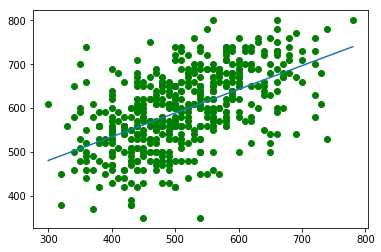

In [28]:
plt.scatter(df['527 applicants to Wabash College in a recent year.'],df['Unnamed: 1'],c='green')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))